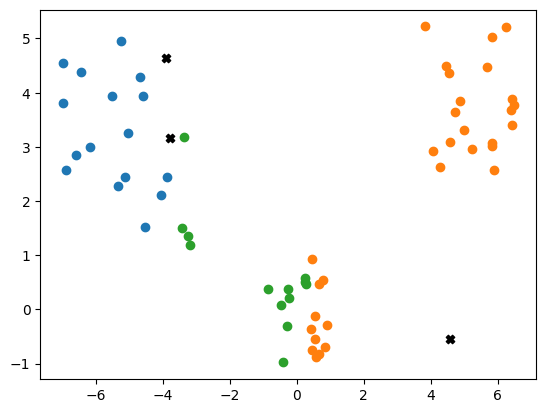

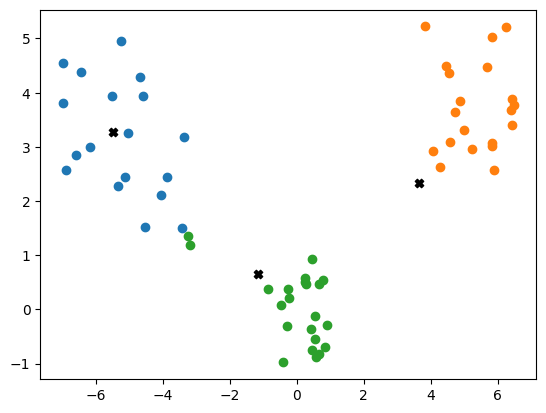

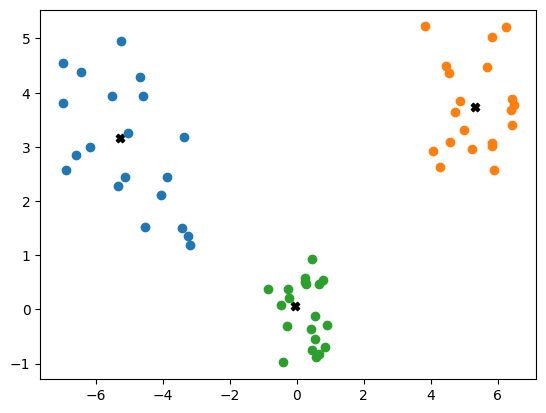

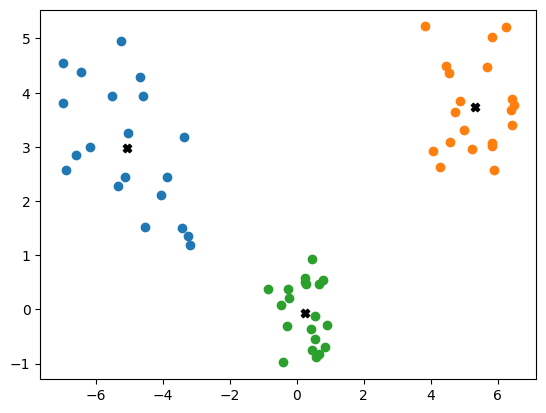

In [28]:
import matplotlib.pyplot as plt
from random import *
import numpy as np
from matplotlib.widgets import Button

seed(42)
k = 3
n = 20


r1 = 1.5
r2 = 1
r3 = 2
x1, y1 = 5, 4
x2, y2 = 0, 0
x3, y3 = -5, 3

x11 = [uniform(x1+r1, x1-r1) for i in range(n)]
y11 = [uniform(y1+r1, y1-r1) for i in range(n)]

x22 = [uniform(x2+r2, x2-r2) for i in range(n)]
y22 = [uniform(y2+r2, y2-r2) for i in range(n)]

x33 = [uniform(x3+r3, x3-r3) for i in range(n)]
y33 = [uniform(y3+r3, y3-r3) for i in range(n)]


x = x11 + x22 + x33
y = y11 + y22 + y33

coords = list(zip(x, y))
shuffle(coords)

def euclidian_distance(x, y):
    return sum([(x[i] - y[i])**2 for i in range(len(x) - 1)])**0.5

def min_for_dim(X):
    return [min([i[dim] for i in X]) for dim in range(len(X[0]))]
def max_for_dim(X):
    return [max([i[dim] for i in X]) for dim in range(len(X[0]))]

def cluster_mean(X):
    if len(X) != 0:
        return [sum(i[dim] for i in X)/len(X) for dim in range(len(X[0]))]
    return [0]


def kmeans(X, k):
    iterations = {'centers': [], 'labels': []}
    centers = [list((uniform(i, j)) for i, j in zip(min_for_dim(X), max_for_dim(X))) for _ in range(k)]
    lastlabels = [-1] * len(X)
    labels = [-1] * len(X)
    all_labels = []
    while True:
        distances = [0] * len(X)
        m1 = []
        m2 = []
        m3 = []
        for i in range(len(X)):
            mn = 10**8
            for j in range(k):
                dist = euclidian_distance(X[i], centers[j])
                if dist < mn:
                    labels[i] = j
                    distances[i] = dist
                    mn = dist
            if labels[i] == 0:
                m1.append(X[i])
            if labels[i] == 1:
                m2.append(X[i])
            if labels[i] == 2:
                m3.append(X[i])
        if ((len(m1) != 0) * (len(m2) != 0) * (len(m3) !=0)) != 0:
            iterations['centers'].append(centers)
            iterations['labels'].append(labels)

            centers = [cluster_mean(m1), cluster_mean(m2), cluster_mean(m3)]   
            if labels == lastlabels:
                return iterations
            
            lastlabels = labels
            labels = [-1] * len(X)
        else:
            centers = [list((uniform(i, j)) for i, j in zip(min_for_dim(X), max_for_dim(X))) for _ in range(k)]
iterations = kmeans(coords, 3)
cent = iterations['centers']

def massives(x, n):
    labels = iterations['labels'][n]
    m1 = []
    m2 = []
    m3 = []
    for i in range(len(x)):
        if labels[i] == 0:
            m1.append(x[i])
        if labels[i] == 1:
            m2.append(x[i])
        if labels[i] == 2:
            m3.append(x[i])
    m = [m1,m2,m3]
    return m
    
for k in range(len(cent)):
    c_x = [i[0] for i in iterations['centers'][k]]
    c_y = [i[1] for i in iterations['centers'][k]]
    plt.scatter(c_x, c_y, marker='X', c='black')
    massive = massives(coords, k)
    labels_1, labels_2, labels_3 = massive[0], massive[1], massive[2]
    x_1 = [i[0] for i in labels_1]
    y_1 = [i[1] for i in labels_1]
    x_2 = [i[0] for i in labels_2]
    y_2 = [i[1] for i in labels_2]
    x_3 = [i[0] for i in labels_3]
    y_3 = [i[1] for i in labels_3]
    plt.scatter(x_1, y_1)
    plt.scatter(x_2, y_2)
    plt.scatter(x_3, y_3)
    plt.show()